OBSERVATIONS ACCORDING TO THE DATA ANALYSIS

1.- We can see that the observations per drug regimen are pretty close to one another, so we can be calm that the data is not skewed to an specific treatment.

2.- Even when I didn't look closely at the data of all the mice that were treated with the Capomulin regimen, we can observe in the line plot of tumor volume vs. time point for an specific mouse that the treatment is pretty effective, since the tumor volume was reduced significantly when we compare the volume between the first and the last time point.

3.-When we look at the scatterplot of the average tumor_volume vs weight in the Capomulin regimen we can observe that there is a positive relationship, and we confirm that with pearson's correlation since it is close to 1. We can say that when the tumor is bigger the mouse is heavier, but we have to be careful because correlation doesn't necessarily means causality.

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
import scipy.stats as st

# Data files path
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice
mice = len(data["Mouse ID"].unique())
print(f"{mice} mice were observed in this study")

249 mice were observed in this study


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# This command generates a boolean variable that turns True when the Mouse ID is duplicate on the same Timepoint
duplicates= data.duplicated(subset=['Mouse ID', 'Timepoint'])

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
# According to the boolean variable generated we get the rest of the data for the duplicated cases
duplicate_mice = data[duplicates]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

# In order to preserve data of the 249 mice we keep the last measurement of the duplicate mouse from each timepoint 
data_clean = data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

# We rename the columns for easier manipulation
data_clean = data_clean.rename(columns = {'Drug Regimen': 'Drug_Regimen','Weight (g)' : 'Weight', 
                                          'Tumor Volume (mm3)': 'Tumor_Volume',
                                          'Metastatic Sites' : 'Metastatic_Sites'})
data_clean.head()

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice =  len(data_clean["Mouse ID"].unique())
print(f"{clean_mice} mice were observed in this study, after cleaning the database")

249 mice were observed in this study, after cleaning the database


**SUMMARY STATISTICS**

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# We group the data by Drug Regimen 
by_drug = data_clean.groupby(['Drug_Regimen'])

# Calculate the mean of the tumor volume by Drug Regimen
mean = by_drug.Tumor_Volume.mean()

# Calculate the median of the tumor volume by Drug Regimen
median = by_drug.Tumor_Volume.median()

# Calculate the variance of the tumor volume by Drug Regimen
variance =  by_drug.Tumor_Volume.var()

# Calculate the standard deviation of the tumor volume by Drug Regimen
sd = by_drug.Tumor_Volume.std()

# Calculate the SEM of the tumor volume by Drug Regimen
st_error = by_drug.Tumor_Volume.sem()

# Create a data frame with the results
pd.DataFrame({"Mean" : mean, "Median" : median, "Variance" : variance, "Standard Deviation" : sd, "SEM" : st_error})


,Mean,Median,Variance,Standard Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
data_clean.groupby(['Drug_Regimen']).agg({'Tumor_Volume':['mean','median','var','std','sem']})

Tumor_Volume                                          
                     mean     median        var       std       sem
Drug_Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

**BAR AND PIE CHARTS**

(0.0, 240.0)

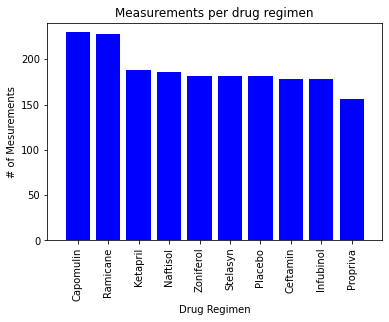

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Count the number of measurements taken for each drug regimen
measurements = data_clean['Drug_Regimen'].value_counts()

# Plot
measurements.plot(kind='bar', title ='Measurements per drug regimen', facecolor = 'b', width = 0.8)
plt.xlabel('Drug Regimen') #x axis label
plt.ylabel('# of Mesurements') #y axis label
plt.xlim(-1, len(measurements)) #x axis limit
plt.ylim(0,240) #y axis limit

(0.0, 240.0)

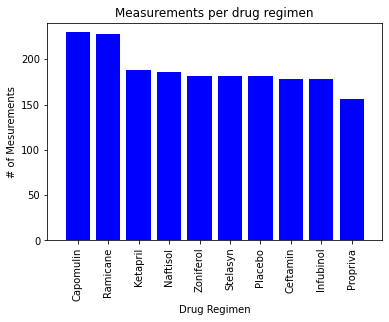

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Plot
plt.bar(measurements.index.tolist(),measurements, color = 'b', width = 0.8)
plt.xticks(rotation='vertical') #Rotation of x ticks
plt.title('Measurements per drug regimen') #Title 
plt.xlabel('Drug Regimen') #x axis label
plt.ylabel('# of Mesurements')#y axis label
plt.xlim(-1, len(measurements)) #x axis limit
plt.ylim(0,240) #y axis limit

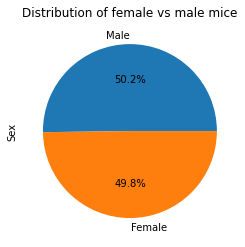

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Count of male and female mice
gender = mouse_metadata['Sex'].value_counts()

# Plot
gender.plot(kind='pie', title ='Distribution of female vs male mice',  autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

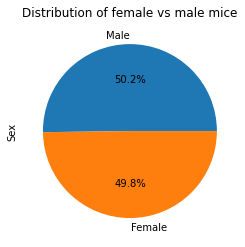

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the names of the categories
labels = gender.index.tolist()

# Plot
plt.pie(gender, labels=labels,  autopct="%1.1f%%")
plt.title('Distribution of female vs male mice') #Add title
plt.ylabel('Sex') #Add y axis label


**QUARTILES, OUTLIERS AND BOXPLOTS**

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of the promising treatment regimens 
p_treatments = ['Capomulin','Ramicane','Infubinol', 'Ceftamin']

# Sort the data by Timepoint in ascending order and identify the last observations per mouse by getting rid of
# the first observations.
f_points = data_clean.sort_values(by = "Timepoint").drop_duplicates(subset=["Mouse ID"], keep="last")  

# Get the data of the measurements of the four promising treatment regimens
fp_points = f_points[f_points.Drug_Regimen.isin(p_treatments)]

# Check the data
fp_points.head()


,Mouse ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
940,h531,Ceftamin,Male,5,27,5,47.784682,0


In [15]:
# Create a data frame only with the variables needed
df_fil = fp_points[['Mouse ID', 'Drug_Regimen', 'Tumor_Volume']]

# For loop to calculate IQR and determine the outliers
for treatment in p_treatments:
    if treatment == 'Capomulin':
        ca_data = df_fil[df_fil['Drug_Regimen'] == treatment]
        ca_vol = ca_data['Tumor_Volume']
        ca_quar = ca_vol.quantile([.25,.5,.75])
        ca_lowerq = ca_quar[0.25]
        ca_upperq = ca_quar[0.75]
        ca_iqr = ca_upperq-ca_lowerq
        ca_lbound = ca_lowerq - (1.5*ca_iqr)
        ca_ubound = ca_upperq + (1.5*ca_iqr)
        print('------------------------------------------------------------------------------------------')
        print(f"The interquartile range of the tumor volume for the {treatment} treatment is: {round(ca_iqr,2)}")
        print(f"Values below {round(ca_lbound,2)} could be outliers for the {treatment} treatment.")
        print(f"Values above {round(ca_ubound,2)} could be outliers for the {treatment} treatment.")
        print('------------------------------------------------------------------------------------------')
  
    elif treatment == 'Ramicane':
        r_data = df_fil[df_fil['Drug_Regimen'] == treatment]
        r_vol = r_data['Tumor_Volume']
        r_quar = r_vol.quantile([.25,.5,.75])
        r_lowerq = r_quar[0.25]
        r_upperq = r_quar[0.75]
        r_iqr = r_upperq-r_lowerq
        r_lbound = r_lowerq - (1.5*r_iqr)
        r_ubound = r_upperq + (1.5*r_iqr)
        print('------------------------------------------------------------------------------------------')
        print(f"The interquartile range of the tumor volume for the {treatment} treatment is: {round(r_iqr,2)}")
        print(f"Values below {round(r_lbound,2)} could be outliers for the {treatment} treatment.")
        print(f"Values above {round(r_ubound,2)} could be outliers for the {treatment} treatment.")
        print('------------------------------------------------------------------------------------------')

    elif treatment == 'Infubinol':
        i_data = df_fil[df_fil['Drug_Regimen'] == treatment]
        i_vol = i_data['Tumor_Volume']
        i_data = df_fil[df_fil['Drug_Regimen'] == treatment]
        i_vol = i_data['Tumor_Volume']
        i_quar = i_vol.quantile([.25,.5,.75])
        i_lowerq = i_quar[0.25]
        i_upperq = i_quar[0.75]
        i_iqr = i_upperq-i_lowerq
        i_lbound = i_lowerq - (1.5*i_iqr)
        i_ubound = i_upperq + (1.5*i_iqr)
        print('------------------------------------------------------------------------------------------')
        print(f"The interquartile range of the tumor volume for the {treatment} treatment is: {round(i_iqr,2)}")
        print(f"Values below {round(i_lbound,2)} could be outliers for the {treatment} treatment.")
        print(f"Values above {round(i_ubound,2)} could be outliers for the {treatment} treatment.")
        print('------------------------------------------------------------------------------------------')
   
    else:
        ce_data = df_fil[df_fil['Drug_Regimen'] == treatment]
        ce_vol = ce_data['Tumor_Volume']
        ce_quar = ce_vol.quantile([.25,.5,.75])
        ce_lowerq = ce_quar[0.25]
        ce_upperq = ce_quar[0.75]
        ce_iqr = ce_upperq-ce_lowerq
        ce_lbound = ce_lowerq - (1.5*ce_iqr)
        ce_ubound = ce_upperq + (1.5*ce_iqr)
        print('------------------------------------------------------------------------------------------')
        print(f"The interquartile range of the tumor volume for the {treatment} treatment is: {round(ce_iqr,2)}")
        print(f"Values below {round(ce_lbound,2)} could be outliers for the {treatment} treatment.")
        print(f"Values above {round(ce_ubound,2)} could be outliers for the {treatment} treatment.")
        print('------------------------------------------------------------------------------------------')


------------------------------------------------------------------------------------------
The interquartile range of the tumor volume for the Capomulin treatment is: 7.78
Values below 20.7 could be outliers for the Capomulin treatment.
Values above 51.83 could be outliers for the Capomulin treatment.
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The interquartile range of the tumor volume for the Ramicane treatment is: 9.1
Values below 17.91 could be outliers for the Ramicane treatment.
Values above 54.31 could be outliers for the Ramicane treatment.
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
The interquartile range of the tumor volume for the Infubinol treatment is: 11.48
Values below 36.83 could be outliers for t

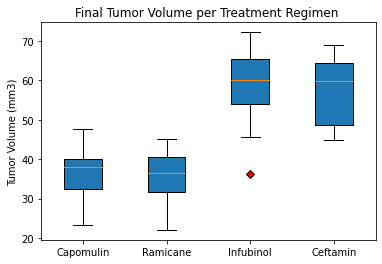

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D') #Define the outliers style
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Treatment Regimen ') #Title 
ax1.set_ylabel('Tumor Volume (mm3)')#y axis label
ax1.boxplot([ca_vol, r_vol, i_vol, ce_vol], flierprops=red_diamond,labels = p_treatments, patch_artist = True) #create boxplot
plt.show()

**LINE AND SCATTER PLOTSS**

<function matplotlib.pyplot.show(*args, **kw)>

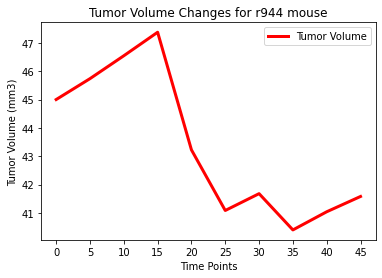

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select Capomulin data from the clean data frame
capo_data = data_clean[data_clean['Drug_Regimen'] == 'Capomulin']

# Pick a random mouse that was treated with Capomulin
mouse_selected = rd.choice(capo_data['Mouse ID'].unique())

# Get the data of the mouse that was randomly picked
mouse_df = capo_data[capo_data['Mouse ID'] == mouse_selected]

# Generate a line plot of tumor volume vs. time point for a randomly picked mouse treated with Capomulin
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor_Volume'], color ='red', label = 'Tumor Volume', lw = 3)
plt.legend(loc="best")
plt.title('Tumor Volume Changes for ' + mouse_selected + ' mouse')
plt.xlabel('Time Points')
plt.xticks(np.arange(min(mouse_df['Timepoint']), max(mouse_df['Timepoint'])+1, 5))
plt.ylabel('Tumor Volume (mm3)')
plt.show


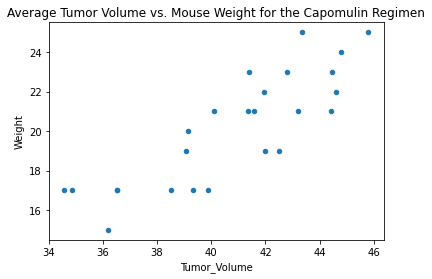

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a new data frame where the average tumor volume is calculated for each mouse 
scatter_data = capo_data.groupby(['Mouse ID']).agg({'Tumor_Volume':'mean', 'Weight' : 'mean'})

# Generate the scatter plot
scatter_data.plot(kind='scatter', x = 'Tumor_Volume', y = 'Weight', 
                  title = 'Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()

**CORRELATION AND REGRESSION**

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = scatter_data.Weight #define weight variable
volume = scatter_data.Tumor_Volume #define solume variable

correlation = st.pearsonr(volume,weight) #calculate the correlation coefficient

#Print results
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")


The correlation coefficient between mouse weight and average tumor volume is 0.84


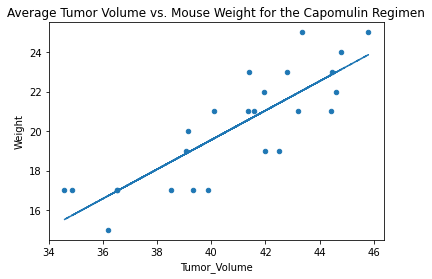

In [47]:
# Linear regression on weight versus average tumor volume for the Capomulin regime
(slope, intercept, rvalue, pvalue, std_err) = st.linregress(volume,weight)

# Create equation of line to calculate predicted weight
weight_fit = slope * volume + intercept

# Plot the linear regression model on top of the previous scatter plot
scatter_data.plot(kind='scatter', x = 'Tumor_Volume', y = 'Weight', 
                  title = 'Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.plot(volume, weight_fit,"--")
plt.show()
